Stock Price Prediction using Moving Average Statistical methodology

In [2]:
#import necesaary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import os
import statistics

In [5]:
df=pd.read_csv('/content/INFY.csv',usecols=['Date','Close'],parse_dates=['Date'],index_col='Date')

In [100]:
df.head()

,Close
Date,
1999-03-11,1.464844
1999-03-12,1.457031
1999-03-15,1.324219
1999-03-16,1.312500
1999-03-17,1.320313


In [99]:
df.shape

(4627, 1)

In [ ]:
df.info()

In [105]:
print(df.index.min())

1999-03-11 00:00:00


In [ ]:
print(df.index.max())

In [ ]:
plt.figure(figsize=(17,5))
df.Close.plot()
plt.title("Closing PRICE",fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
stock_price=pd.concat([df.Close[:'2004-07-01'],df.Close['2004-07-01':]])
#stock_price=df
plt.plot(stock_price)
plt.title("Closing Price Adjusted",fontsize=20)
plt.show()

In [15]:
#split data for training and testing module
train_value=stock_price.iloc[:3000]
test_value=stock_price.iloc[3000:]
def plot_pred(pred,title):
  plt.figure(figsize=(20,6))
  plt.plot(train_value,label='Train')
  plt.plot(test_value,label='Actual')
  plt.plot(pred,label='Predicted')
  plt.ylabel("Stock Price")
  plt.title(title,fontsize=20)
  plt.legend()
  plt.show()

In [16]:
y_av=pd.Series(np.repeat(train_value.mean(),1628),index=test_value.index)
mse(y_av,test_value)

44.30171335543789

In [ ]:
plot_pred(y_av,"Average")

In [ ]:
#using machine learning
y_train=stock_price[:3000]
y_test=stock_price[3000:]
print(y_train.shape)
print(y_test.shape)

In [109]:
x_train=pd.DataFrame([list(stock_price[i:i+1628]) for i in range(3000)],
                     columns=range(1628,0,-1),index=y_train.index)
x_test=pd.DataFrame([list(stock_price[i:i+1628]) for i in range(3000,4628)],
                    columns=range(1628,0,-1),index=y_test.index)
x_train
#print(x_train.shape)
#print(x_test.shape)

,1628,1627,1626,1625,1624,1623,1622,1621,1620,1619,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
1999-03-11,1.464844,1.457031,1.324219,1.312500,1.320313,1.343750,1.312500,1.320313,1.261719,1.273438,...,8.81250,8.75625,8.84375,8.77000,8.77125,8.70375,8.46250,8.57875,8.59125,8.74250
1999-03-12,1.457031,1.324219,1.312500,1.320313,1.343750,1.312500,1.320313,1.261719,1.273438,1.320313,...,8.75625,8.84375,8.77000,8.77125,8.70375,8.46250,8.57875,8.59125,8.74250,8.83500
1999-03-15,1.324219,1.312500,1.320313,1.343750,1.312500,1.320313,1.261719,1.273438,1.320313,1.417969,...,8.84375,8.77000,8.77125,8.70375,8.46250,8.57875,8.59125,8.74250,8.83500,8.78625
1999-03-16,1.312500,1.320313,1.343750,1.312500,1.320313,1.261719,1.273438,1.320313,1.417969,1.433594,...,8.77000,8.77125,8.70375,8.46250,8.57875,8.59125,8.74250,8.83500,8.78625,8.84875
1999-03-17,1.320313,1.343750,1.312500,1.320313,1.261719,1.273438,1.320313,1.417969,1.433594,1.417969,...,8.77125,8.70375,8.46250,8.57875,8.59125,8.74250,8.83500,8.78625,8.84875,8.89375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-02,17.004999,17.087500,16.920000,17.184999,17.245001,17.002501,16.830000,16.780001,17.035000,17.072500,...,15.32000,15.47000,15.64000,15.56000,15.67000,15.64000,15.55000,15.38000,15.52000,15.68000
2011-02-03,17.087500,16.920000,17.184999,17.245001,17.002501,16.830000,16.780001,17.035000,17.072500,17.167500,...,15.47000,15.64000,15.56000,15.67000,15.64000,15.55000,15.38000,15.52000,15.68000,15.68000
2011-02-04,16.920000,17.184999,17.245001,17.002501,16.830000,16.780001,17.035000,17.072500,17.167500,17.389999,...,15.64000,15.56000,15.67000,15.64000,15.55000,15.38000,15.52000,15.68000,15.68000,15.81000


In [110]:
#moving average
y_ma=x_test.mean(axis=1)
mse(y_ma,y_test), np.sqrt(mse(y_ma,y_test))

(5.615627691151676, 2.3697315652097974)

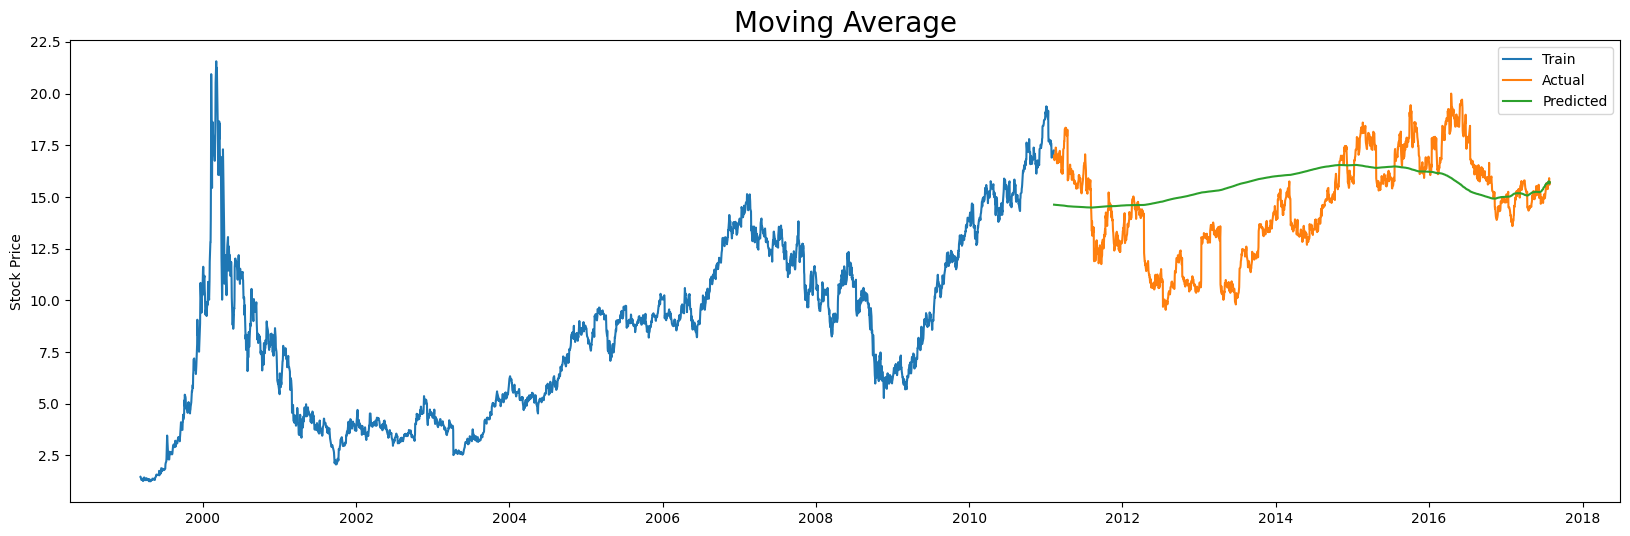

In [111]:
plot_pred(y_ma,"Moving Average")

In [113]:
# Import necessary packages
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2score = r2_score(y_test, y_ma)

# Print the R-squared score
print("R-squared score: {:.4f}".format(r2score))

R-squared score: 0.0013
